# EV Curves

## pyiron

In [1]:
from workflows.pyiron.build import bulk
from workflows.pyiron.evcurves import calculate_ev_curves
from pyiron_workflow import Workflow, as_function_node
from workflows.pyiron.kg import KnowledgeDict 

In [2]:
pair_style = "eam/alloy"
pair_coeff = "* * workflows/potentials/Fe_Ack.eam Fe"

In [3]:
kg = KnowledgeDict()

In [4]:
wf = Workflow('ev1')
wf.structure = bulk('Fe', cubic=True, kg=kg)
wf.ev_curves = calculate_ev_curves(wf.structure, 
                                  pair_style, pair_coeff, kg=kg)

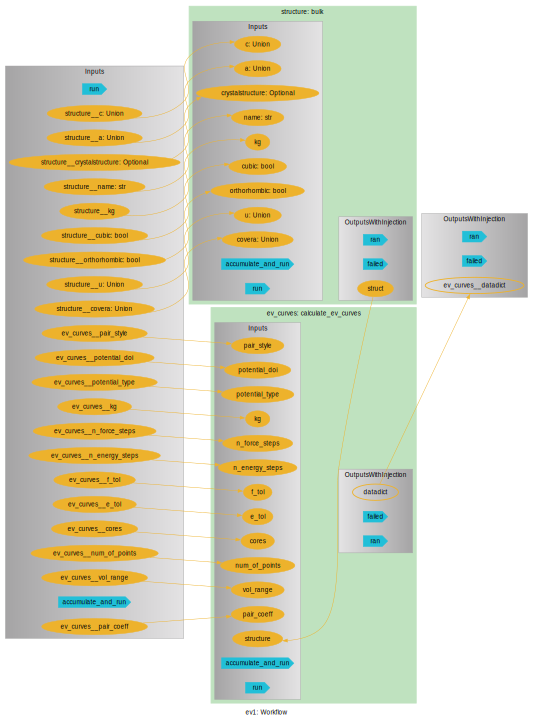

In [5]:
wf.draw(size=(15, 10))

In [6]:
wf.run()

{'ev_curves__datadict': {'energy': array([25.66734498, 23.09850269, 20.70179192, 18.46524246, 16.3780793 ,
         14.43055302, 12.61380071, 10.91973072,  9.34092649,  7.8705657 ,
          6.5023517 ,  5.23045507,  4.04946355,  2.95433879,  1.94037886,
          1.00318562,  0.13863616, -0.65714233, -1.38779469, -2.05675743,
         -2.66727614, -3.22242107, -3.72510099, -4.17807571, -4.58396729,
         -4.94527016, -5.2643603 , -5.54350351, -5.78486298, -5.99050617,
         -6.16241106, -6.30247191, -6.41250448, -6.49425091, -6.5493841 ,
         -6.57951185, -6.58618058, -6.57087887, -6.53504065, -6.48004818,
         -6.40723488, -6.31788784, -6.2132503 , -6.0945238 , -5.96287035,
         -5.81941433, -5.66524433, -5.50141484, -5.3289479 , -5.14883454,
         -4.96203622, -4.76948616, -4.57209059, -4.3707299 , -4.16625976,
         -3.95951218, -3.75129647, -3.5424002 , -3.33359005, -3.12561267,
         -2.91919547, -2.71504734, -2.51385939, -2.31630562, -2.12304355,
     

In [7]:
kg.to_yaml('yamls/01_evcurve.yaml')

## jobflow

In [6]:
from workflows.jobflow.build import bulk
from workflows.jobflow.evcurves import calculate_ev_curves
from jobflow import job, run_locally, Flow

/home/menonsqr/miniforge3/envs/fec/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
job1 = bulk(name ='Fe', cubic=True)
job2 = calculate_ev_curves(job1.output, pair_style, pair_coeff)

In [8]:
flow = Flow([job1, job2])

<module 'matplotlib.pyplot' from '/home/menonsqr/miniforge3/envs/fec/lib/python3.12/site-packages/matplotlib/pyplot.py'>

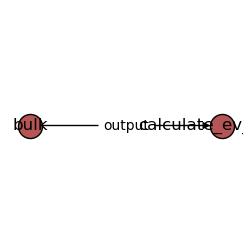

In [9]:
flow.draw_graph(figsize=(3,3))

In [10]:
run_locally(flow)

2025-09-26 13:44:12,490 INFO Started executing jobs locally
2025-09-26 13:44:12,493 INFO Starting job - bulk (11947397-8af8-4663-9742-9aa3415ff32c)
2025-09-26 13:44:12,495 INFO Finished job - bulk (11947397-8af8-4663-9742-9aa3415ff32c)
2025-09-26 13:44:12,495 INFO Starting job - calculate_ev_curves (8bb5217f-411d-4f10-857e-784eb35d4010)


--------------------------------------------------------------------------

  Local host:   login003
  Local device: hfi1_0
--------------------------------------------------------------------------
--------------------------------------------------------------------------

  Local host:   login003
  Local device: hfi1_0
--------------------------------------------------------------------------
--------------------------------------------------------------------------

  Local host:   login003
  Local device: hfi1_0
--------------------------------------------------------------------------
--------------------------------------------------------------------------

  Local host:   login003
  Local device: hfi1_0
--------------------------------------------------------------------------
--------------------------------------------------------------------------

  Local host:   login003
  Local device: hfi1_0
--------------------------------------------------------------------------


2025-09-26 13:44:15,595 INFO Finished job - calculate_ev_curves (8bb5217f-411d-4f10-857e-784eb35d4010)
2025-09-26 13:44:15,595 INFO Finished executing jobs locally


{'11947397-8af8-4663-9742-9aa3415ff32c': {1: Response(output=Structure Summary
  Lattice
      abc : 2.87 2.87 2.87
   angles : 90.0 90.0 90.0
   volume : 23.639903
        A : 2.87 0.0 0.0
        B : 0.0 2.87 0.0
        C : 0.0 0.0 2.87
      pbc : True True True
  PeriodicSite: Fe (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
  PeriodicSite: Fe (1.435, 1.435, 1.435) [0.5, 0.5, 0.5], detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False, job_dir=PosixPath('/home/menonsqr/repos/FeC'))},
 '8bb5217f-411d-4f10-857e-784eb35d4010': {1: Response(output={'energy': array([25.66734496, 23.09850269, 20.70179193, 18.46524248, 16.37807932,
         14.43055306, 12.61380075, 10.91973076,  9.34092654,  7.87056576,
          6.50235176,  5.23045514,  4.04946362,  2.95433886,  1.94037893,
          1.0031857 ,  0.13863624, -0.65714225, -1.38779462, -2.05675736,
         -2.66727607, -3.22242099, -3.72510091, -4.17807564, -4.58396722,
         -4.9452701 , -5.26436024,